<figure>
  <IMG SRC="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Fachhochschule_Südwestfalen_20xx_logo.svg/320px-Fachhochschule_Südwestfalen_20xx_logo.svg.png" WIDTH=250 ALIGN="right">
</figure>

# Einführung Machine Learning
### Sommersemester 2022
Prof. Dr. Heiner Giefers

# MLP Modelle trainieren

In diesem Aufgabenblatt geht es darum, MLP-Modelle mit *Scikit-learn* und *Keras* aufzustellen und zu trainieren.
Wir verwenden dazu einen synthetischen, nicht-linear-separierbaren Datensatz mit 3 Klassen von Datenpunkten.

(-1.0, 1.0)

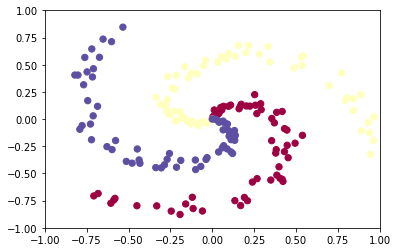

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def make_spirals(N=100, dim=2, classes=2, random_state=0):
    np.random.seed(random_state)
    X = np.zeros((N*classes,dim))
    num_train_examples = X.shape[0]
    y = np.zeros(N*classes, dtype='uint8')
    for j in range(classes):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        k = classes+1
        t = np.linspace(j*k,(j+1)*k,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X, y

N=60
dim=2
classes=3
random_state=0

X, y = make_spirals(N, dim, classes, random_state)
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])

Wie man in folgendem Beispiel sieht, schneidet ein Lineares Modell bei diesen Daten sehr schlecht ab:

In [2]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, multi_class='ovr').fit(X, y)
clf.score(X, y)

0.5222222222222223

In [3]:
def plot_decregions_2d(X,clf):
    '''
    Plotte Entscheidungsgrenzen in einem
    Datensatz mit zwei Attributen
    
    Parameter:
    X: 2d numpy array der Groesse (m,n)
    clf: Klassifizierer mit einer Methoder "predict"
    '''
    cmap = plt.get_cmap('Set1', 3)
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Z.shape)
    if Z.ndim>1:
        Z = np.argmax(Z, axis=1)
        print(Z.shape)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, ec='black', cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

(35530,)


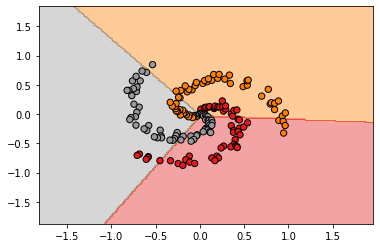

In [4]:
plot_decregions_2d(X,clf)

**Aufgabe:** Trainieren Sie einen MLPClassifier (aus SKlearn) für den Datensatz. Das MLP soll einen *hidden layer* mit 32 Neuronen besitzen. Welche *Classification Accuracy* Erreicht Ihr Modell für den Trainigsdatensatz? Plotten Sie die Entscheidungsgrenzen Ihres Modells.

In [ ]:
from sklearn.neural_network import MLPClassifier

X, y = load_iris(return_X_y=True)
>>> knn = KNeighborsClassifier(n_neighbors=3)
>>> sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
>>> sfs.fit(X, y)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=3)
>>> sfs.get_support()
array([ True, False,  True,  True])
>>> sfs.transform(X).shape

**Aufgabe:** Erstellen Sie das gleiche Modell mit Tensorflow. verwenden Sie dazu die *Keras Sequential API*.

In [7]:
import tensorflow as tf
from tensorflow import keras

tX = X.astype('float64')
ty = y.astype('float64')

optimizer ='RMSprop'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']

model = keras.Sequential()
model.add(keras.layers.Input((2,)))
model.add(keras.layers.Dense(32, activation=tf.nn.relu))
model.add(keras.layers.Dense(3, activation=tf.nn.softmax))


#Modell erzeugen
model.compile(optimizer,loss,metrics)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                96        
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


(35530, 3)
(35530,)


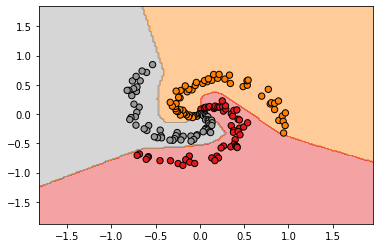

In [8]:
#Modell trainieren
model.fit(tX, ty, epochs=500, verbose=0)
plot_decregions_2d(tX,model)

**Aufgabe:** Geben Sie die Accuracy des trainierten Modells für die Trainingsdaten aus.

In [11]:
test_loss, test_acc = model.evaluate (tX, ty)

print('Test accuracy:', test_acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.9611
Test accuracy: 0.9611111283302307
